Once deleted, variables cannot be recovered. Proceed (y/[n])? y
[288.43754521 310.79200725 309.2845198  307.8211324  307.34310507
 325.29053773 317.97126664 317.38631567 291.41058665 322.52116025
 337.18139301 339.36298306 346.98644915 347.74925084 360.11711254
 368.41529361 366.92221451 347.02780523 334.0390601  362.70823343]


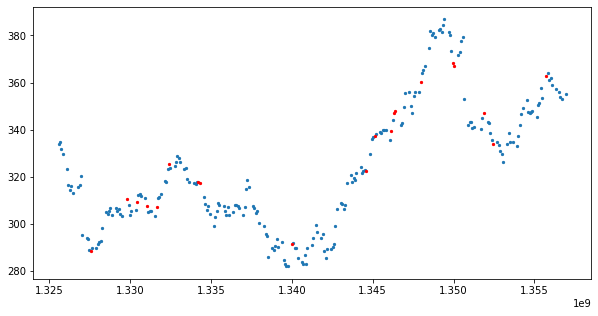

In [357]:
%reset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dat=[]
dattme=[]
dattmemissing=[]

with open(r'C:\Users\sudha\Desktop\CogniantAssignment\input01.txt') as f:
    for line in f:
        aa=line.split("\t")
        
        if len(aa)==2:
            if aa[1].find('Miss')==-1:
                dat.append(float(aa[1]))
                dattme.append(aa[0])
            else:
                dattmemissing.append(aa[0])
                  
                
ydata=np.array(dat)

from datetime import datetime
times=[]
for ii in range(len(dattme)):
    date_string=dattme[ii]
    dt_object = datetime.strptime(date_string, "%m/%d/%Y %H:%M:%S")
    timestamp = datetime.timestamp(dt_object)
    times.append(timestamp)
xdata=np.array(times)
# xdata=(xdata-xdata[0])

plt.figure(figsize=(10,5))    
plt.scatter(xdata,ydata,s=5)


from datetime import datetime
times2=[]
for jj in range(len(dattmemissing)):
    date_string2=dattmemissing[jj]
    dt_object2 = datetime.strptime(date_string2, "%m/%d/%Y %H:%M:%S")
    timestamp2 = datetime.timestamp(dt_object2)
    times2.append(timestamp2)
xdatamissing=np.array(times2)
# xdatamissing=(xdatamissing-xdata[0])


ydatamissing=np.zeros(len(xdatamissing))+np.min(ydata)
# plt.scatter(xdatamissing,ydatamissing,s=5)




from scipy import interpolate
def f(x):
    x_points = xdata
    y_points = ydata

    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

ydatamissing=f(xdatamissing)
print(ydatamissing)
plt.scatter(xdatamissing,ydatamissing,s=5,color='r')
